<a href="https://colab.research.google.com/github/Murarin8877/FinancialBigDataAnalysis-homework/blob/main/week7_ann_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Work1 類神經網路模型預測股票價格(pytoch)

In [ ]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件
from sklearn.metrics import mean_squared_error # 計算 mse 誤差
import matplotlib.pyplot as plt # 畫圖套件
import numpy as np # 數值計算套件
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
stock_id = "2330.TW"
start = dt.datetime(2020, 1, 1)  # 開始日期
end = dt.datetime(2023, 1, 1)    # 結束日期

# Step 2: 下載股票數據
data = yf.download(stock_id, start=start, end=end).reset_index()

df = data.copy()
df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
0,2020-01-02 00:00:00+00:00,306.430206,339.0,339.0,332.5,332.5,31754120
1,2020-01-03 00:00:00+00:00,306.882202,339.5,345.0,335.5,344.0,41811268
2,2020-01-06 00:00:00+00:00,300.102753,332.0,334.5,332.0,333.0,45343057
3,2020-01-07 00:00:00+00:00,297.842926,329.5,333.0,326.5,332.5,50879181
4,2020-01-08 00:00:00+00:00,297.842926,329.5,333.0,325.0,325.0,37567748
...,...,...,...,...,...,...,...
729,2022-12-26 00:00:00+00:00,441.325226,456.5,457.0,453.5,454.0,8793306
730,2022-12-27 00:00:00+00:00,441.808624,457.0,462.5,457.0,458.0,10264001
731,2022-12-28 00:00:00+00:00,436.008087,451.0,452.0,446.0,451.0,32578949


In [ ]:
df.columns

MultiIndex([(     'Date',        ''),
            ('Adj Close', '2330.TW'),
            (    'Close', '2330.TW'),
            (     'High', '2330.TW'),
            (      'Low', '2330.TW'),
            (     'Open', '2330.TW'),
            (   'Volume', '2330.TW')],
           names=['Price', 'Ticker'])

In [ ]:
df.columns = df.columns.droplevel('Ticker')
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02 00:00:00+00:00,306.430206,339.0,339.0,332.5,332.5,31754120
1,2020-01-03 00:00:00+00:00,306.882202,339.5,345.0,335.5,344.0,41811268
2,2020-01-06 00:00:00+00:00,300.102753,332.0,334.5,332.0,333.0,45343057
3,2020-01-07 00:00:00+00:00,297.842926,329.5,333.0,326.5,332.5,50879181
4,2020-01-08 00:00:00+00:00,297.842926,329.5,333.0,325.0,325.0,37567748


In [ ]:

data = df.copy()
# 將日期欄位轉為datetime格式
data['Date'] = pd.to_datetime(data['Date']).dt.date
# 將日期欄位設為索引
data.set_index('Date', inplace=True)

# 选择收盘价
closing_prices = data['Close'].values.reshape(-1, 1)

# 数据标准化
scaler = MinMaxScaler()
closing_prices_scaled = scaler.fit_transform(closing_prices)

# 保留日期索引
dates = data.index  # 获取日期索引

# 创建特征和目标，同时保存日期
def create_dataset_with_dates(data, dates, lookback, predict_days):
    X, Y, Y_dates = [], [], []
    for i in range(len(data) - lookback - predict_days):
        X.append(data[i:i+lookback, 0])  # 过去lookback天的收盘价作为特征
        Y.append(data[i + lookback + predict_days, 0])  # N天后的收盘价作为标签
        Y_dates.append(dates[i + lookback + predict_days])  # 保存对应日期
    return torch.Tensor(X), torch.Tensor(Y), Y_dates




lookback = 5  # 过去5天的数据作为输入
predict_days = 1  # 预测n天后的股价

# 使用包含日期的函数创建数据集
X, y, y_dates = create_dataset_with_dates(closing_prices_scaled, dates, lookback, predict_days)

# 划分训练集和测试集
X_train, X_test, y_train, y_test, train_dates, test_dates = train_test_split(X, y, y_dates, test_size=0.2, shuffle=False)

# 打印检查数据
print(X_train.shape, y_train.shape)


# 打印检查数据
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Training Dates:", train_dates[:5])  # 显示前5个日期样本

torch.Size([582, 5]) torch.Size([582])
Training Data Shape: torch.Size([582, 5]) torch.Size([582])
Training Dates: [datetime.date(2020, 1, 10), datetime.date(2020, 1, 13), datetime.date(2020, 1, 14), datetime.date(2020, 1, 15), datetime.date(2020, 1, 16)]


<ipython-input-5-9e87397e6a1e>:24: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  return torch.Tensor(X), torch.Tensor(Y), Y_dates


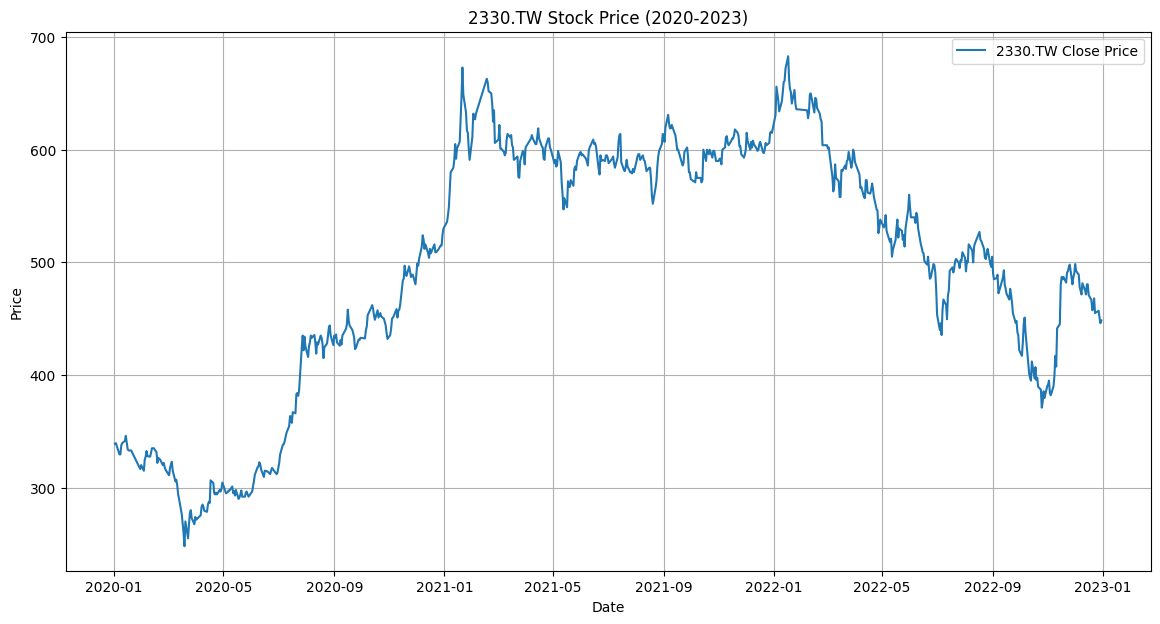

In [ ]:
#可視化股票收盤價
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label="2330.TW Close Price")
plt.title("2330.TW Stock Price (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
class StockANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(StockANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 模型参数
input_size = lookback  # 输入是过去 lookback 天的收盘价
hidden_size = 64       # 隐藏层大小
output_size = 1        # 输出是1天后的收盘价

# 实例化模型
model = StockANN(input_size, hidden_size, output_size)

In [ ]:
# 损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

    # 前向传播
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.2869
Epoch [20/100], Loss: 0.1063
Epoch [30/100], Loss: 0.0330
Epoch [40/100], Loss: 0.0184
Epoch [50/100], Loss: 0.0145
Epoch [60/100], Loss: 0.0083
Epoch [70/100], Loss: 0.0048
Epoch [80/100], Loss: 0.0031
Epoch [90/100], Loss: 0.0020
Epoch [100/100], Loss: 0.0015


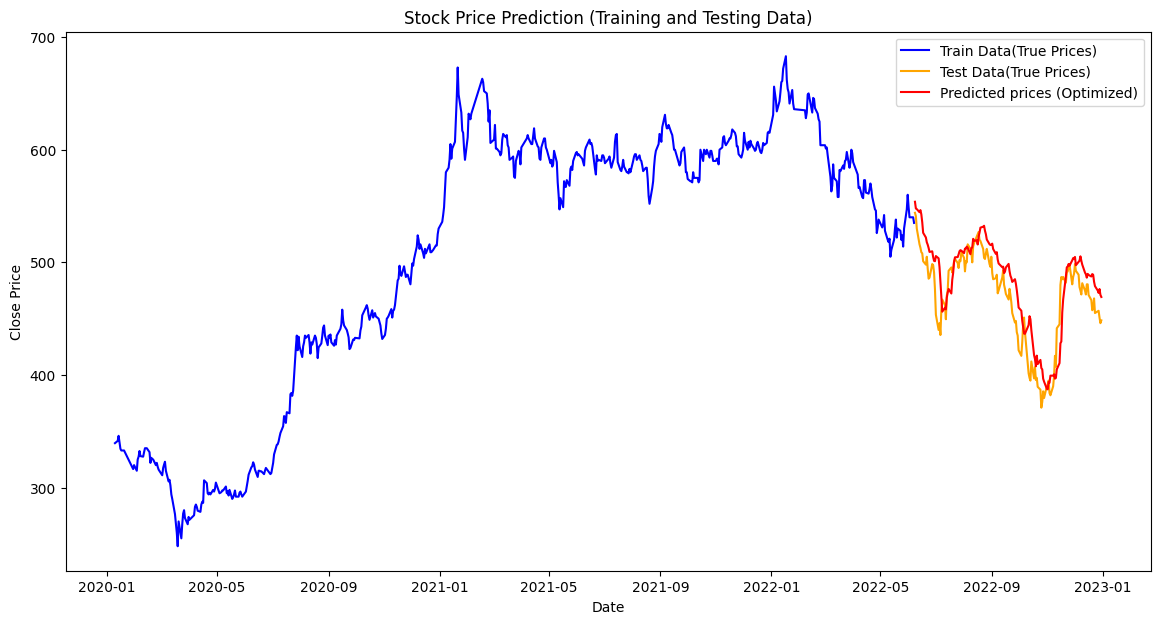

In [ ]:
# 模型评估训练集的预测结果
model.eval()
with torch.no_grad():
    # 训练集预测
    train_predictions = model(X_train).squeeze()
    train_predicted_prices = scaler.inverse_transform(train_predictions.numpy().reshape(-1, 1))
    train_actual_prices = scaler.inverse_transform(y_train.numpy().reshape(-1, 1))

    # 测试集预测
    test_predictions = model(X_test).squeeze()
    test_predicted_prices = scaler.inverse_transform(test_predictions.numpy().reshape(-1, 1))
    test_actual_prices = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

# 可视化结果
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(train_dates, train_actual_prices, label='Train Data(True Prices)', color='blue')
plt.plot(test_dates, test_actual_prices, label='Test Data(True Prices)', color='orange')
plt.plot(test_dates, test_predicted_prices, label='Predicted prices (Optimized)', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction (Training and Testing Data)')
plt.legend()
plt.show()


#Work2:實作 CNN 捕捉 K 線趨勢，並預測股價漲跌（分類任務）。

In [ ]:
import numpy as np # 數值計算套件
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件
import matplotlib.pyplot as plt # 畫圖套件
from sklearn.metrics import mean_squared_error # 計算 mse 誤差

In [ ]:
# 輸入股票代號
stock_id = '2330.tw'
# stock_id = '2357.tw'
# stock_id = '2317.tw'
# stock_id = 'AAPL'
# stock_id = 'NVDA'

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

'''抓取特定時間'''
# start = dt.datetime(2020, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 10, 10)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
stock_data = yf.download(stock_id, start=start, end=end).reset_index()

# 將日期欄位轉為datetime格式
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
# 將日期欄位設為索引
stock_data.set_index("Date", inplace=True)

# 刪除 Ticker 欄位並取代
stock_data.columns = stock_data.columns.droplevel('Ticker')

stock_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-04-29 00:00:00+00:00,788.423279,795.0,795.0,787.0,790.0,26765837
2024-04-30 00:00:00+00:00,783.464661,790.0,802.0,790.0,797.0,39051972
2024-05-02 00:00:00+00:00,765.613525,772.0,789.0,772.0,789.0,40527228
2024-05-03 00:00:00+00:00,773.547363,780.0,788.0,773.0,788.0,29901556
2024-05-06 00:00:00+00:00,779.497742,786.0,793.0,786.0,791.0,32599878
...,...,...,...,...,...,...
2024-10-18 00:00:00+00:00,1085.000000,1085.0,1100.0,1075.0,1095.0,85011961
2024-10-21 00:00:00+00:00,1085.000000,1085.0,1095.0,1080.0,1090.0,36491060
2024-10-22 00:00:00+00:00,1075.000000,1075.0,1075.0,1060.0,1065.0,41197877


In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.0 MB/s eta 0:00:00


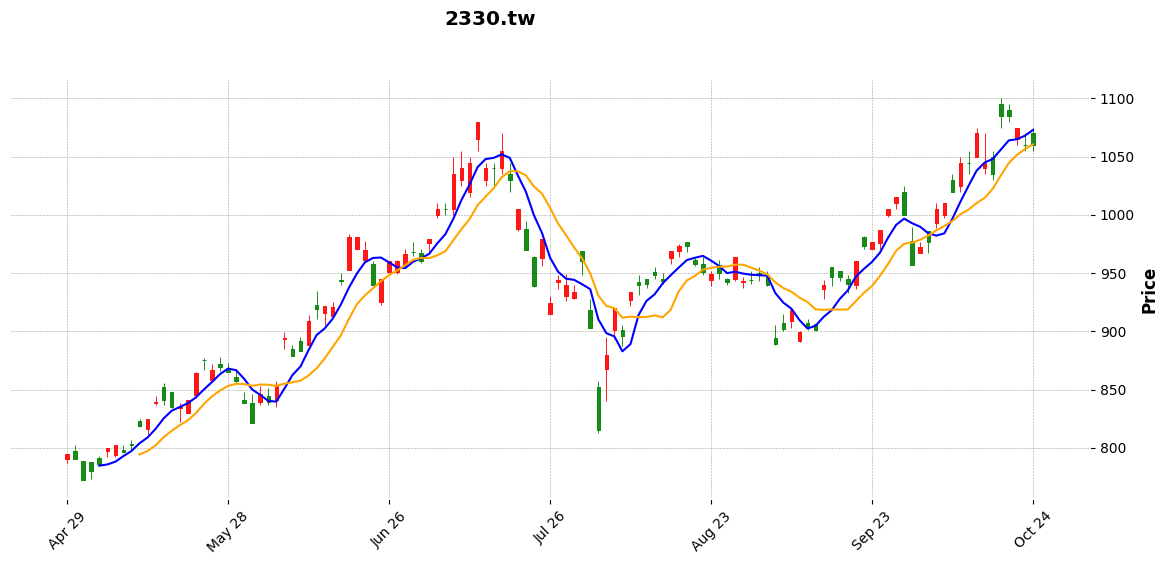

In [ ]:
import mplfinance as mpf

# 設置 K 線繪圖風格，漲為紅色，跌為綠色
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=my_color)

# 計算 5 日和 10 日均線
stock_data['MA5'] = stock_data['Close'].rolling(window=5).mean()
stock_data['MA10'] = stock_data['Close'].rolling(window=10).mean()

# 設定兩條均線的顏色
add_plots = [
    mpf.make_addplot(stock_data['MA5'], color='blue', width=1.5),
    mpf.make_addplot(stock_data['MA10'], color='orange', width=1.5)
]

# 繪製 K 線圖並添加均線
mpf.plot(stock_data,
         type='candle',
         style=my_style,
         title=f'{stock_id}',
         figsize=(15, 6),
         addplot=add_plots)

# 保存帶有不同顏色均線的 K 線圖
mpf.plot(stock_data,
         type='candle',
         style=my_style,
         title=f'{stock_id}',
         figsize=(15, 6),
         addplot=add_plots,
         savefig='k_line_with_colored_ma.png')

In [ ]:
# 輸入股票代號
stock_id = '2330.tw'

# 抓取特定時間
start = dt.datetime(2006, 1, 1)  # 指定的開始日期
end = dt.datetime(2010, 10, 10)    # 指定的結束日期

# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
stock_data = yf.download(stock_id, start=start, end=end).reset_index()

# 將日期欄位轉為datetime格式
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
# 將日期欄位設為索引
stock_data.set_index('Date', inplace=True)
# 刪除 Ticker 欄位並取代
stock_data.columns = stock_data.columns.droplevel('Ticker')
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2006-01-02 00:00:00+00:00,30.093082,58.341381,59.106514,57.384964,59.106514,30366490
2006-01-03 00:00:00+00:00,31.030409,60.158569,60.158569,57.863174,58.341381,71325650
2006-01-04 00:00:00+00:00,31.277065,60.636780,60.636780,59.297798,60.349854,55262558
2006-01-05 00:00:00+00:00,31.573074,61.210629,61.210629,59.871647,60.636780,44492141
2006-01-06 00:00:00+00:00,32.313061,62.645252,62.645252,61.880119,61.975761,68933386
...,...,...,...,...,...,...
2010-10-04 00:00:00+00:00,40.863171,61.900002,62.099998,61.599998,62.000000,25742000
2010-10-05 00:00:00+00:00,40.335049,61.099998,61.700001,60.900002,61.700001,28432000
2010-10-06 00:00:00+00:00,40.797153,61.799999,62.000000,61.500000,61.900002,34117000


In [ ]:
from PIL import Image # 處理圖像資料
import random # 隨機
import os # 系統檔，讀取資料使用
import mplfinance as mpf

window_size = 30  # K線圖的時間窗口

# 定義短期和長期均線的週期
short_window = 5  # 短期均線
long_window = 20  # 長期均線

# K線圖保存的文件夹
output_dir = 'k_line_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 儲存標籤
labels = []
file_names = []

# 遍歷數據並生成標籤和 K 線圖
for i in range(len(stock_data) - window_size):
    window_data = stock_data.iloc[i:i + window_size]  # 當前 K 線圖窗口

    # 計算短期均線和長期均線
    short_ma = window_data['Close'].rolling(window=short_window).mean().iloc[-1]
    long_ma = window_data['Close'].rolling(window=long_window).mean().iloc[-1]




    # 判斷漲跌：短期均線高於長期均縣則標記為漲，否則標記為跌
    if short_ma > long_ma:
        labels.append(1)  # 漲
        #print('「漲」: 1')
    else:
        labels.append(0)  # 跌
        #print('「跌」: 0')
    if i%10==0:
      print(f'窗口{i}的短期均線: {short_ma}, 長期均線: {long_ma}, 標記為', end='')
      if short_ma > long_ma:
        print('「漲」: 1')
      else:
        print('「跌」: 0')
      print('\n--------------------------------\n')

    # 生成文件名
    file_name = f'k_line_{i}.png'
    file_names.append(file_name)

    # 保存 K 線圖
    mpf.plot(window_data, type='candle', style=my_style, axisoff=True,
             figsize=(15, 6), savefig=os.path.join(output_dir, file_name))

# 保存標籤到 CSV 文件中
labels_df = pd.DataFrame({
    'file_name': file_names,
    'label': labels
})

labels_df.to_csv('labels.csv', index=False)

窗口0的短期均線: 59.37431030273437, 長期均線: 60.168135452270505, 標記為「跌」: 0

--------------------------------

窗口10的短期均線: 58.513536071777345, 長期均線: 59.254758262634276, 標記為「跌」: 0

--------------------------------

窗口20的短期均線: 57.958815002441405, 長期均線: 58.20748291015625, 標記為「跌」: 0

--------------------------------

窗口30的短期均線: 60.88544692993164, 長期均線: 58.51353588104248, 標記為「漲」: 1

--------------------------------

窗口40的短期均線: 65.0936782836914, 長期均線: 61.808389282226564, 標記為「漲」: 1

--------------------------------

窗口50的短期均線: 64.46244506835937, 長期均線: 64.74458694458008, 標記為「跌」: 0

--------------------------------

窗口60的短期均線: 60.17349090576172, 長期均線: 63.791900634765625, 標記為「跌」: 0

--------------------------------

窗口70的短期均線: 57.72085800170898, 長期均線: 60.178273582458495, 標記為「跌」: 0

--------------------------------

窗口80的短期均線: 55.08956604003906, 長期均線: 56.83665142059326, 標記為「跌」: 0

--------------------------------

窗口90的短期均線: 56.26940078735352, 長期均線: 55.86890144348145, 標記為「漲」: 1

-----------------------------

In [ ]:
# 顯示漲跌數據筆數
labels_df['label'].value_counts()

,count
label,
1,592
0,560


#資料前處理

In [ ]:
# 用於資料集拆分訓練、驗證、測試
from sklearn.model_selection import train_test_split

# 先從原始資料中切分出測試集 (20%)
train_df, test_df = train_test_split(labels_df, test_size=0.2, stratify=labels_df['label'], random_state=42)

# 然後再把訓練集劃分成訓練集與驗證集 (80% 訓練，20% 驗證)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

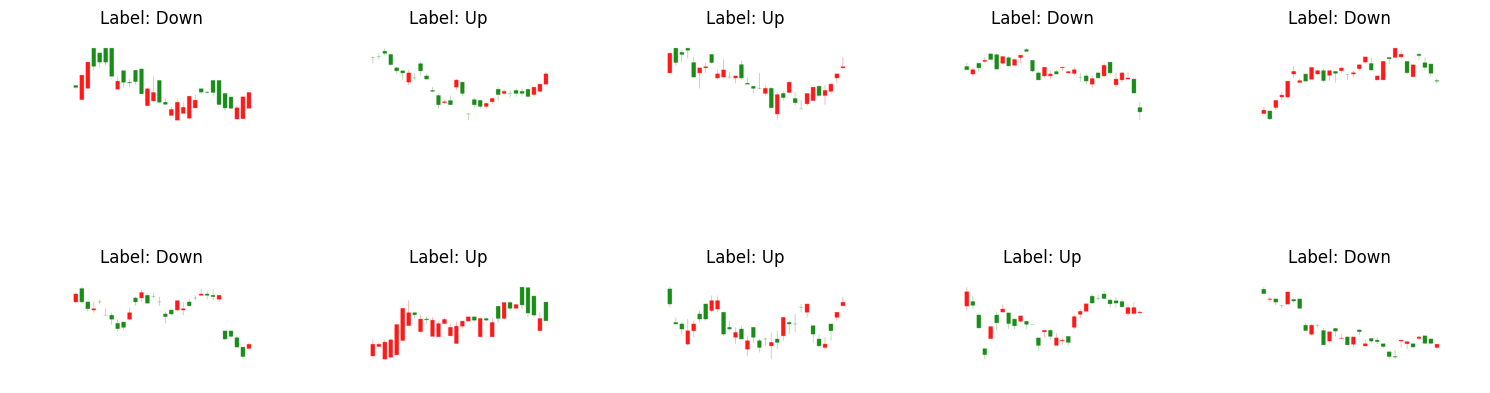

In [ ]:
# 載入 CSV label檔案
output_dir = 'k_line_images'
labels_df = pd.read_csv('labels.csv', dtype={'label': str})

# 隨機選10張圖
random_indices = random.sample(range(len(labels_df)), 10)
selected_images = labels_df.iloc[random_indices]

# 設定 2*5 畫布
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# 將圖放進畫布中
for i, (index, row) in enumerate(selected_images.iterrows()):
    img_path = os.path.join(output_dir, row['file_name'])
    img = Image.open(img_path)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {'Up' if row['label'] == '1' else 'Down'}")

plt.tight_layout()
plt.show()

In [ ]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# 自定义 Dataset 来实现 flow_from_dataframe 的功能
class CustomDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name).convert("RGB")
        label = self.dataframe.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)

        return image, label

# 图像增强的 transform
train_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomRotation(10),          # 随机旋转
    transforms.RandomHorizontalFlip(),      # 水平翻转
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 平移
    transforms.RandomResizedCrop(150, scale=(0.9, 1.1)),  # 随机缩放
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # 归一化
])

# 验证集和测试集不进行数据增强，只做resize和标准化
test_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 读取你的训练和验证的 DataFrame
# 假设 train_df 和 val_df 已经定义
# train_df 和 val_df 分别包含图片的路径 (file_name) 和标签 (label)

# 文件目录
image_dir = 'k_line_images/'

# 定义训练集 Dataset 和 DataLoader
train_dataset = CustomDataset(dataframe=train_df, img_dir=image_dir, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)


# 定义验证集 Dataset 和 DataLoader
val_dataset = CustomDataset(dataframe=val_df, img_dir=image_dir, transform=test_transform)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# 定义测试集 Dataset 和 DataLoader
test_dataset = CustomDataset(dataframe=test_df, img_dir=image_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# 检查数据
for images, labels in train_loader:
    print(images.size(), labels.size())  # 打印图片和标签的大小
    break


torch.Size([8, 3, 150, 150]) torch.Size([8])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # 第一層卷積層 + 批次正規化 + LeakyReLU + 最大池化
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)

        # 第二層卷積層 + 批次正規化 + LeakyReLU + 最大池化
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)

        # 第三層卷積層 + 批次正規化 + LeakyReLU + 最大池化
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2, 2)

        # 全連接層
        self.fc1 = nn.Linear(128 * 16 * 16, 128)  # 注意這裡的輸入尺寸，根據你的圖像尺寸需要修改
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

        # Dropout
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # 第一層卷積層
        x = self.pool1(F.leaky_relu(self.bn1(self.conv1(x))))

        # 第二層卷積層
        x = self.pool2(F.leaky_relu(self.bn2(self.conv2(x))))

        # 第三層卷積層
        x = self.pool3(F.leaky_relu(self.bn3(self.conv3(x))))

        # 展平層
        x = x.view(-1, 128 * 16 * 16)  # 需要根据输入图像的大小进行调整

        # 全连接层 + Dropout
        x = self.dropout(F.leaky_relu(self.fc1(x)))
        x = self.dropout(F.leaky_relu(self.fc2(x)))

        # 输出层，使用 sigmoid 进行二分类
        x = torch.sigmoid(self.fc3(x))
        return x

# 实例化模型
model = CNNModel()

# 定义损失函数和优化器
criterion = nn.BCELoss()  # 对于二分类任务使用 binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 打印模型结构
print(model)

CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

# 定义训练函数
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device='cpu'):
    model = model.to(device)
    best_val_acc = 0.0

    for epoch in range(num_epochs):
        model.train()  # 设置为训练模式
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        # 训练循环
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()

            optimizer.zero_grad()  # 梯度清零

            # 前向传播
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)

            # 反向传播和优化
            loss.backward()
            optimizer.step()

            # 累加损失
            running_loss += loss.item() * inputs.size(0)

            # 预测标签
            predicted = (outputs >= 0.5).float()
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / train_total
        epoch_acc = train_correct / train_total

        # 验证模型
        val_acc = validate_model(model, val_loader, criterion, device)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, Val Acc: {val_acc:.4f}')

        # 保存最好的模型
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_model.pth')
            print(f"New best model saved with validation accuracy: {best_val_acc:.4f}")

# 定义验证函数
def validate_model(model, val_loader, criterion, device='cpu'):
    model.eval()  # 设置为评估模式
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # 关闭梯度计算
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()

            outputs = model(inputs).squeeze()
            predicted = (outputs >= 0.5).float()

            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc = val_correct / val_total
    return val_acc

# 假设模型、数据加载器、损失函数、优化器已定义
model = CNNModel()
criterion = nn.BCELoss()  # 二分类交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 定义设备 (CPU 或 GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 开始训练模型
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device=device)


Epoch [1/10], Loss: 0.7858, Train Acc: 0.5978, Val Acc: 0.7730
New best model saved with validation accuracy: 0.7730
Epoch [2/10], Loss: 0.5934, Train Acc: 0.6848, Val Acc: 0.7784
New best model saved with validation accuracy: 0.7784
Epoch [3/10], Loss: 0.6004, Train Acc: 0.7092, Val Acc: 0.7730
Epoch [4/10], Loss: 0.5530, Train Acc: 0.7296, Val Acc: 0.8054
New best model saved with validation accuracy: 0.8054
Epoch [5/10], Loss: 0.5433, Train Acc: 0.7323, Val Acc: 0.7622
Epoch [6/10], Loss: 0.5033, Train Acc: 0.7690, Val Acc: 0.8757
New best model saved with validation accuracy: 0.8757
Epoch [7/10], Loss: 0.4481, Train Acc: 0.7867, Val Acc: 0.8162
Epoch [8/10], Loss: 0.4391, Train Acc: 0.7962, Val Acc: 0.8270
Epoch [9/10], Loss: 0.4619, Train Acc: 0.8003, Val Acc: 0.8162
Epoch [10/10], Loss: 0.4163, Train Acc: 0.8152, Val Acc: 0.8649


In [ ]:
# 测试模型的函数
def test_model(model, test_loader, criterion, device='cpu'):
    model.eval()  # 设置为评估模式，不使用 dropout 或 batch normalization
    test_loss = 0.0
    test_correct = 0
    test_total = 0

    with torch.no_grad():  # 不计算梯度
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()

            # 前向传播
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)

            # 累加损失
            test_loss += loss.item() * inputs.size(0)

            # 预测标签
            predicted = (outputs >= 0.5).float()
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    avg_test_loss = test_loss / test_total
    test_acc = test_correct / test_total

    return avg_test_loss, test_acc

# 加载最好的模型
best_model = CNNModel()
best_model.load_state_dict(torch.load('best_model.pth'))
best_model = best_model.to(device)

# 定义损失函数
criterion = nn.BCELoss()

# 调用测试函数，进行模型评估
test_loss, test_acc = test_model(best_model, test_loader, criterion, device=device)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')


<ipython-input-23-f0dfdd5432f3>:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('best_model.pth'))


Test Loss: 0.3380, Test Accuracy: 0.8831


In [ ]:
# 将 DataLoader 转换为迭代器，并获取一批数据
test_iter = iter(test_loader)
test_images, test_labels = next(test_iter)

# 将数据传递给模型进行预测
with torch.no_grad():  # 在测试时关闭梯度计算
    predictions = model(test_images.to(device))

# 打印结果
print(predictions)

tensor([[0.1216],
        [0.6034],
        [0.5929],
        [0.0214],
        [0.9934],
        [0.6668],
        [0.9926],
        [0.7765]], device='cuda:0')


實際結果： 跌
預測結果： 跌


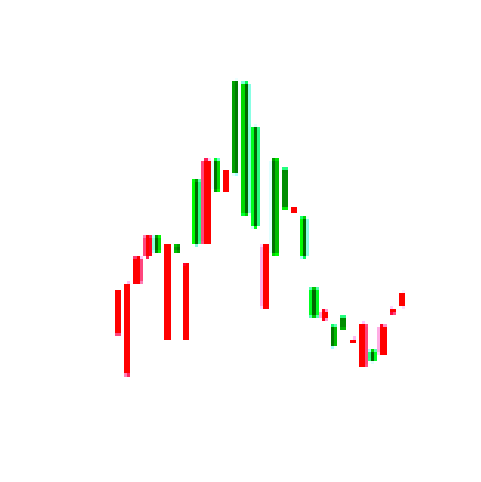

In [ ]:
# 打印實際結果和預測結果
print('實際結果：', '漲' if test_labels[0] == 1 else '跌')  # 實際標籤，0 為跌，1 為漲
print('預測結果：', '漲' if predictions[0] > 0.5 else '跌')  # Sigmoid 0.5 為閾值

# 將 PyTorch 的圖像轉換為適合 Matplotlib 的格式 (H, W, C)
image = test_images[0].permute(1, 2, 0)  # 轉換為 (H, W, C)

# 繪製圖像
plt.figure(figsize=(15, 6))
plt.imshow(image.cpu().numpy())  # 需要將圖像轉換為 numpy 並移到 CPU
plt.axis('off')
plt.show()